<a href="https://colab.research.google.com/github/pojakgol/machine-learning-bootcamp/blob/main/supervised/03_classification/04_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

In [ ]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

In [ ]:
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')

Liczba próbek: 150
Kształt danych: (150, 4)


In [ ]:
df = pd.DataFrame(np.c_[data, target], columns = feature_names + ['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


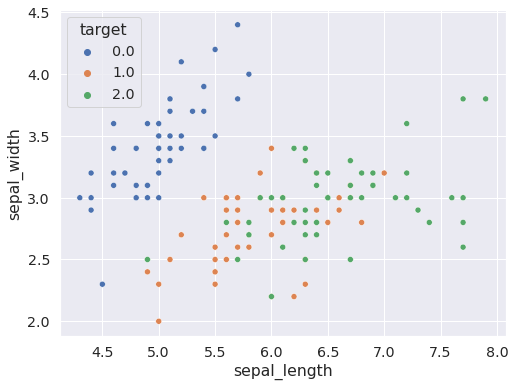

In [ ]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(x='sepal_length', y='sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])

In [ ]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [ ]:
import plotly.express as px

df1 = df.copy()
df1.head()
df1.pop('petal_length')
df1.head()
df1.pop('petal_width')
df1.head()

,sepal_length,sepal_width,target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


In [ ]:
px.scatter(df1, x='sepal_length', y='sepal_width', color='target', width=800)

In [ ]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
data = data.values
target = target.values.astype('int16')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(max_depth=1, random_state=42)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



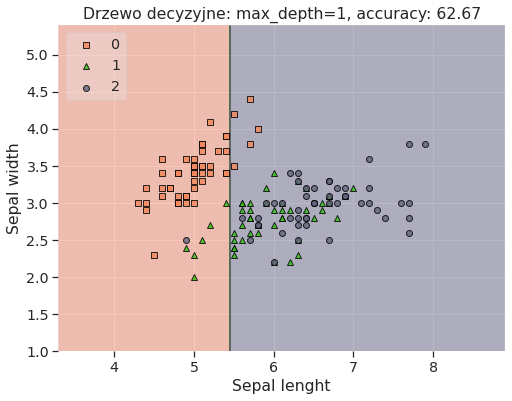

In [ ]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8, 6))
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}')
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.show()

#Budowa funkcji dla modelu drzewa decyzyjnego

In [39]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

def make_decision_tree(max_depth=1):
  # trenowanie modelu
  classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  classifier.fit(data, target)


  # export grafu drzewa
  dot_data = StringIO()
  export_graphviz(classifier,
                  out_file=dot_data,
                  feature_names=feature_names[:2],
                  class_names=target_names,
                  special_characters=True,
                  filled=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('graph.png')

  # obliczanie dokładności
  acc = classifier.score(data, target)

  # wykreślenie granic decyzyjnych
  colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
  plt.figure(figsize=(8, 6))
  plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy={acc * 100}')
  plt.xlabel('Sepal lenght')
  plt.ylabel('Sepal width')
  ax = plot_decision_regions(data, target, classifier, legend=0, colors=colors)
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)

  return Image(graph.create_png(), width=200 + max_depth * 120)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



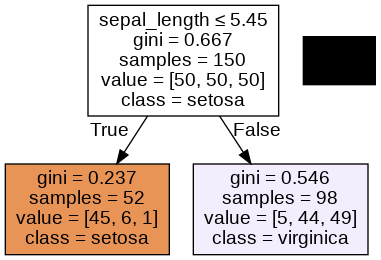

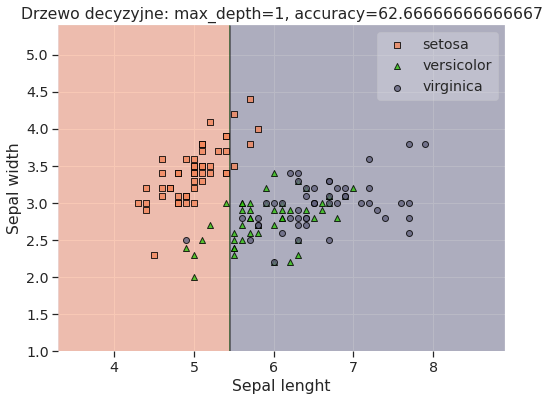

In [40]:
make_decision_tree()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



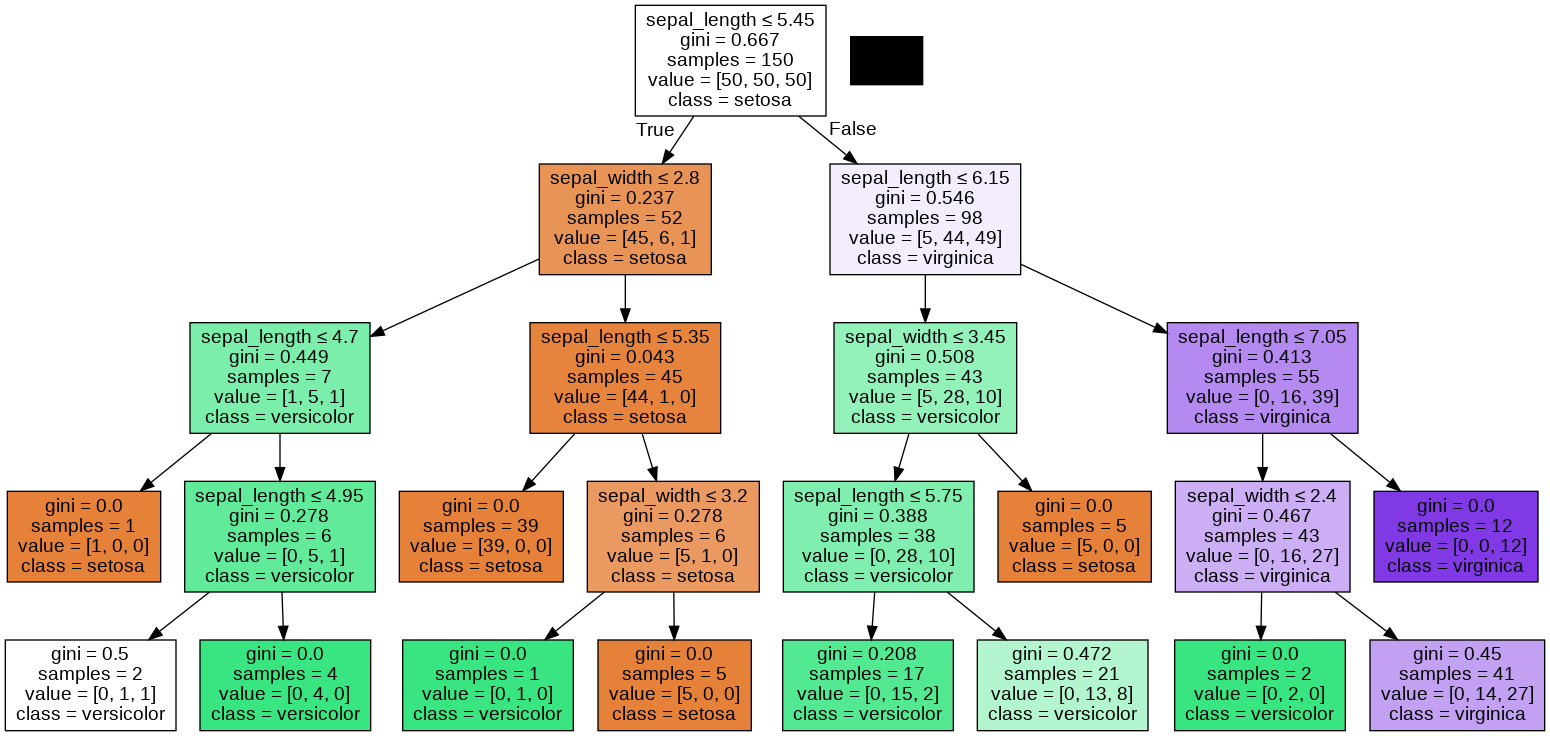

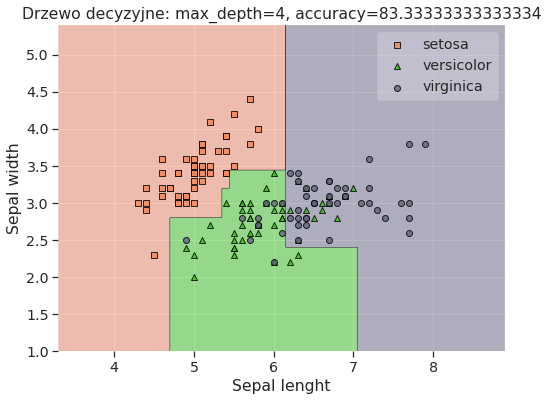

In [41]:
make_decision_tree(4)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



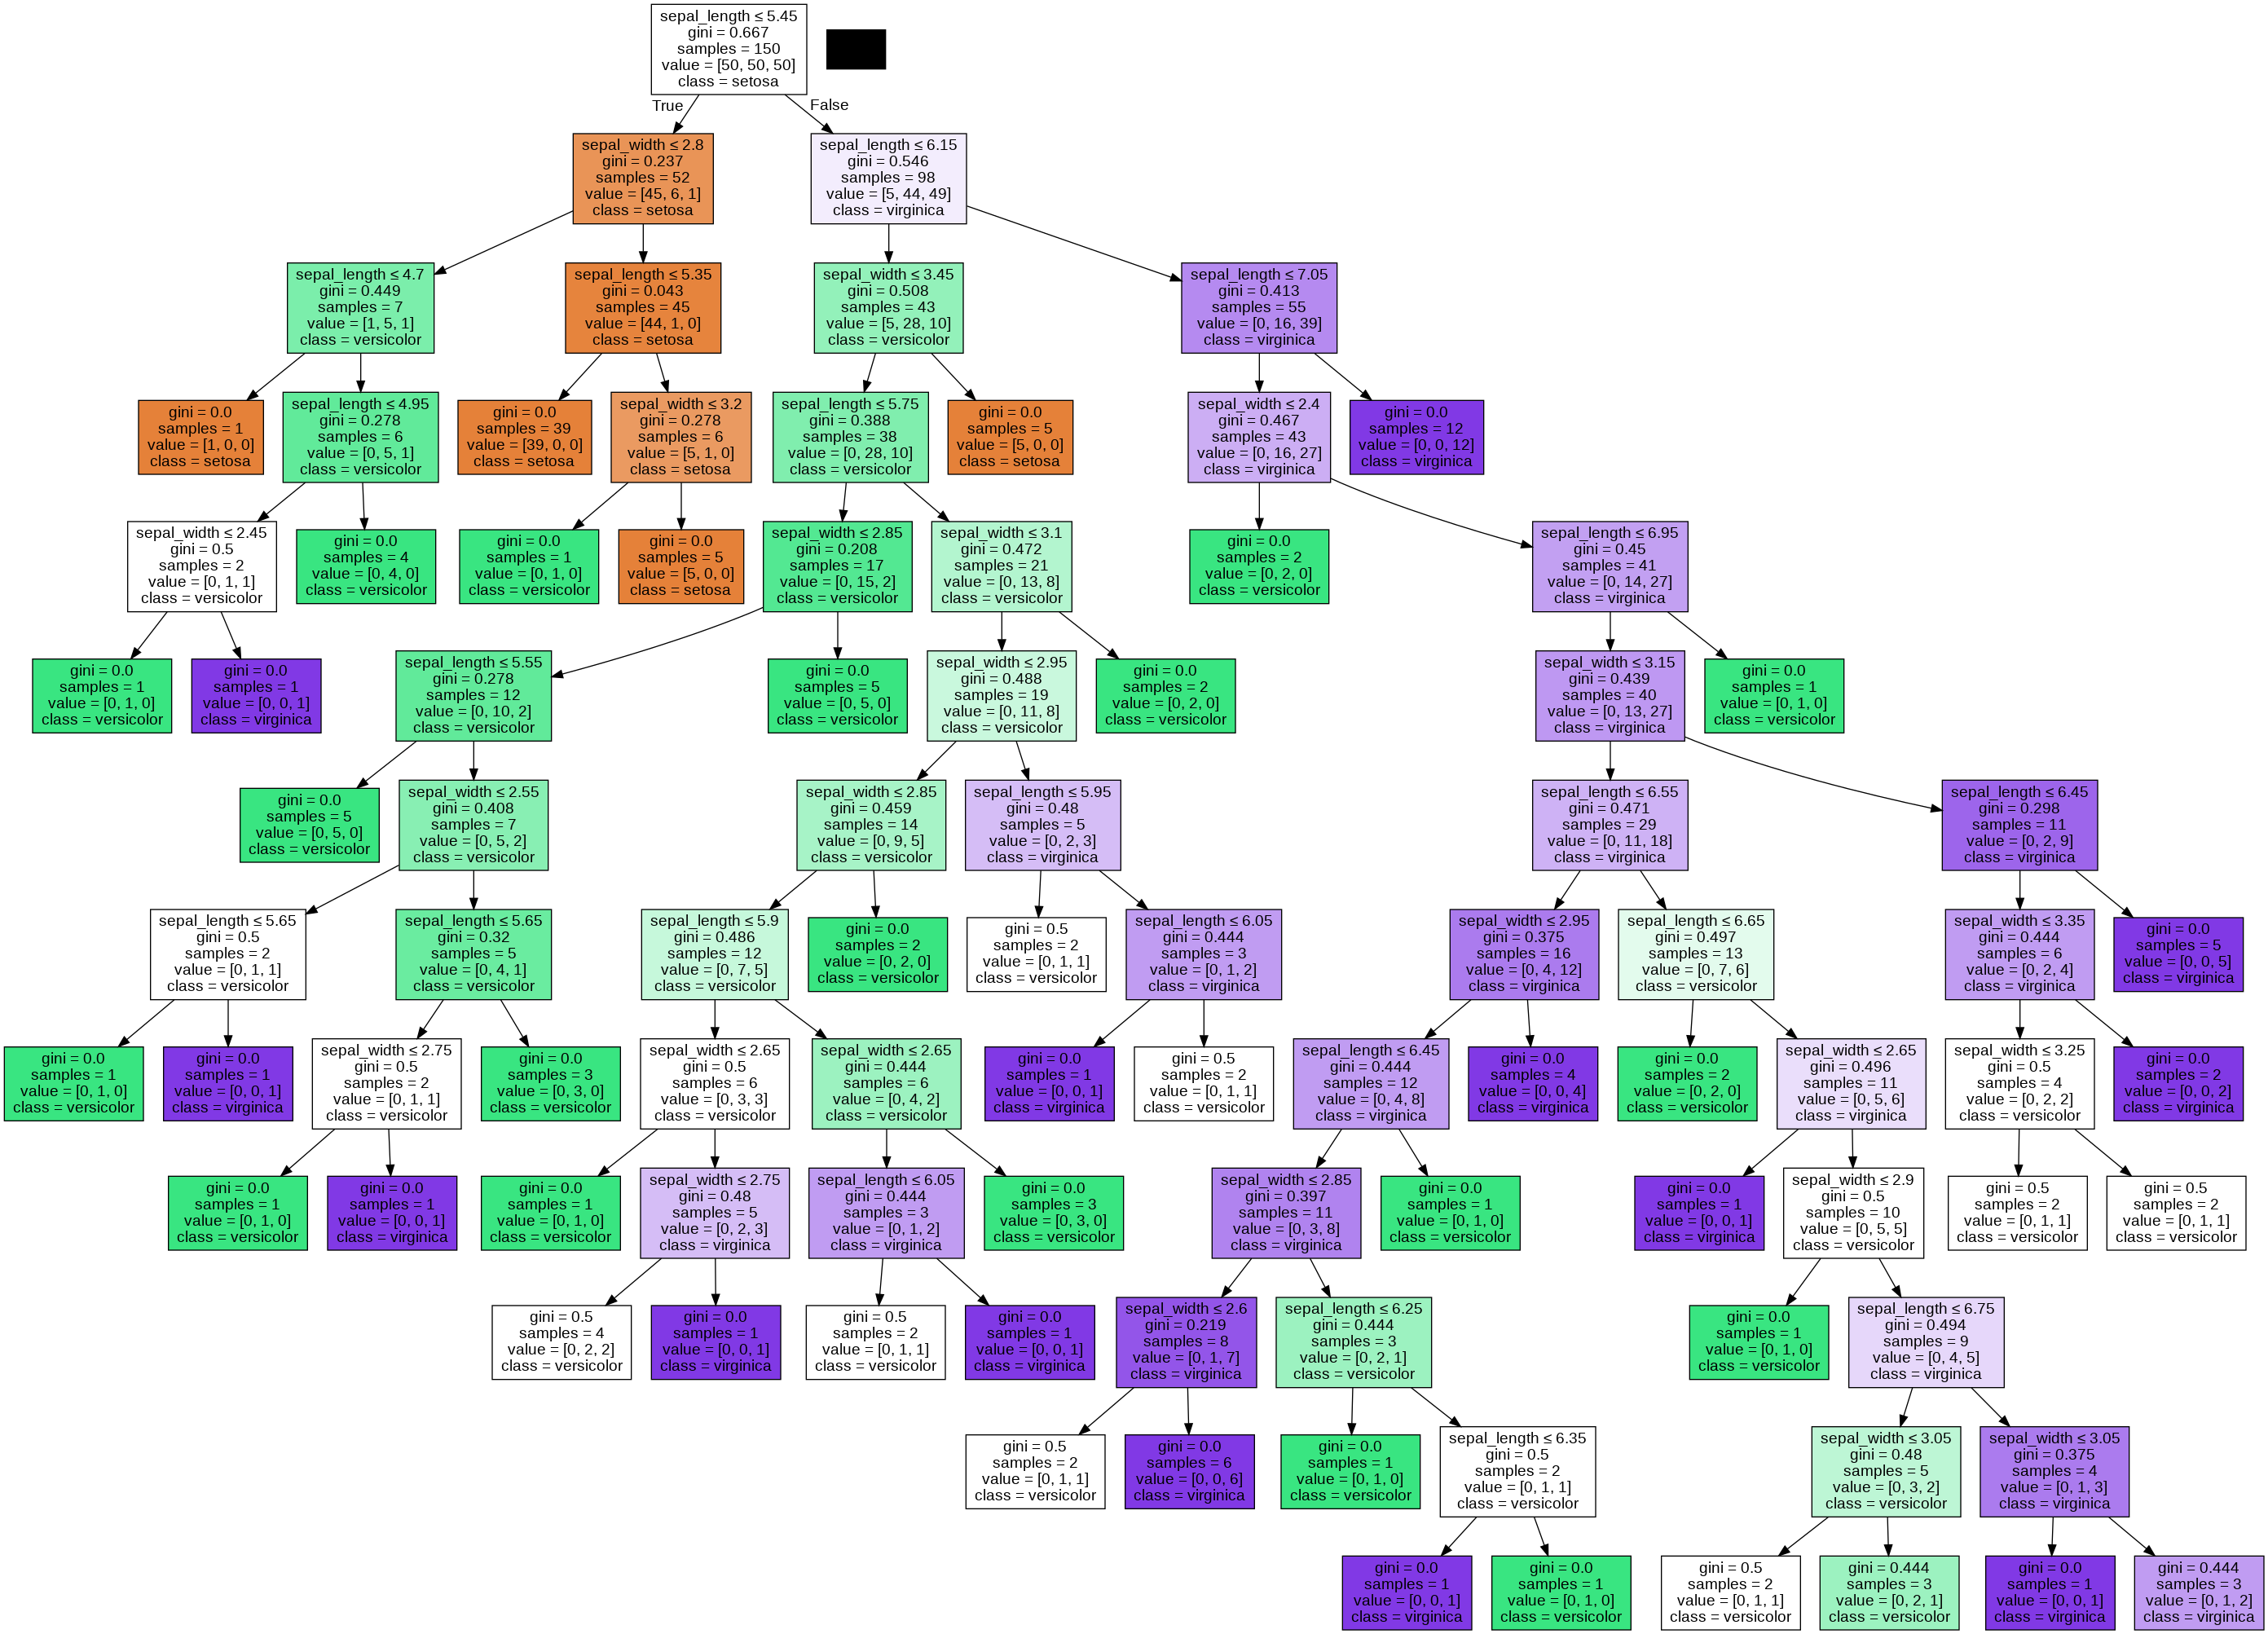

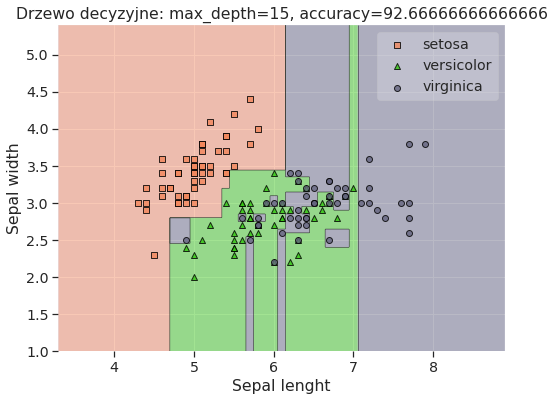

In [42]:
make_decision_tree(15)